In [1]:
import pandas as pd
data = pd.read_csv("data.csv")
data

,Date,Time,Atmospheric pressure,Temperature
0,2024/05/07,09:53,957.6511,30.5261
1,2024/05/07,09:53,957.6496,30.5538
2,2024/05/07,09:53,957.6395,30.5791
3,2024/05/07,09:53,957.6329,30.6057
4,2024/05/07,09:53,957.6193,30.6320
...,...,...,...,...
17172,2024/05/08,09:52,958.4785,34.2801
17173,2024/05/08,09:52,958.4783,34.3153
17174,2024/05/08,09:52,958.4841,34.3571
17175,2024/05/08,09:52,958.4869,34.3978


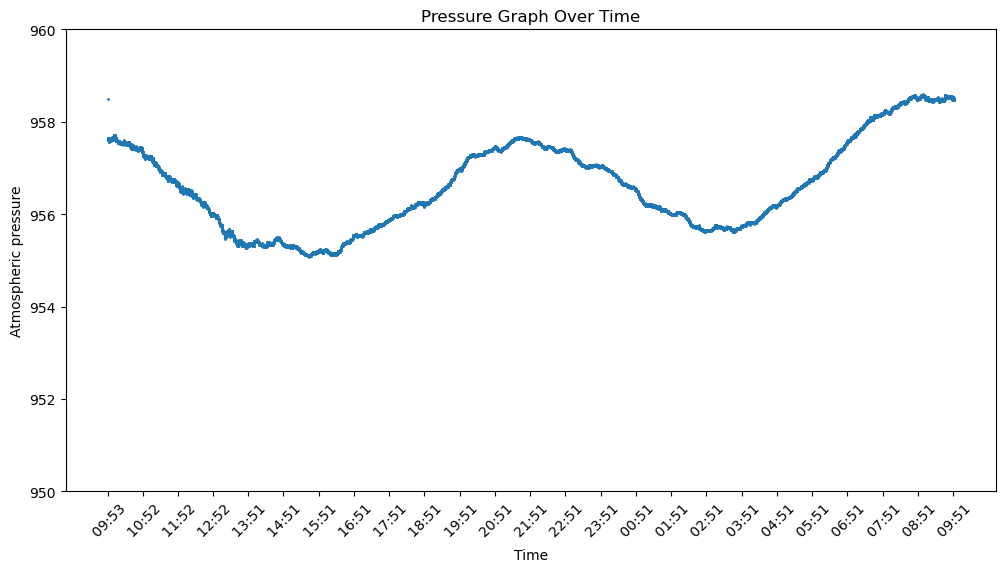

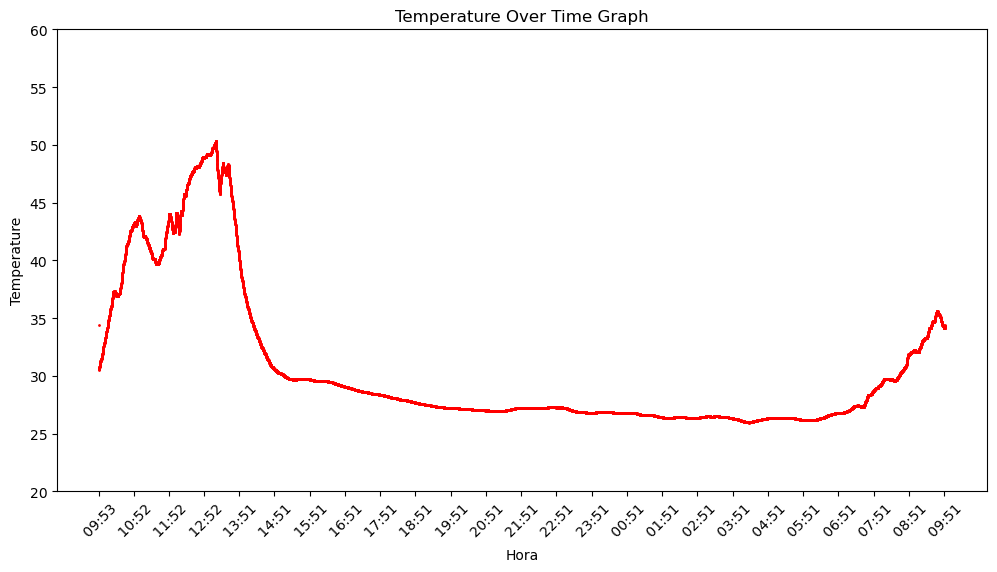

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6)) # Dimensions of the figure

lower_limit_Y = 950
upper_limit_Y = 960

#Settings for better viewing
plt.scatter(data["Time"], data["Atmospheric pressure"], s = 1)
plt.xlabel("Time") # Time as X axis of the graph
plt.ylabel("Atmospheric pressure") # Atmospheric Pressure as Y axis of the graph
plt.title("Pressure Graph Over Time")
plt.xticks(rotation=45)
plt.ylim(lower_limit_Y, upper_limit_Y)

#Filtering schedules into 11 samples
total_points = len(data["Time"])
distance = total_points // 24  
plt.xticks(data["Time"][::distance])

#Preview of the figure
plt.show()



# Now, the graph will be configured with the Temperature

plt.figure(figsize=(12, 6)) # Dimensions of the figure


lower_limit_Y = 20
upper_limit_Y = 60

#Settings for better viewing
plt.scatter(data["Time"], data["Temperature"], color = 'red', s = 1)
plt.xlabel("Hora") # Time as X axis of the graph
plt.ylabel("Temperature") # Temperature as Y axis of the graph
plt.title("Temperature Over Time Graph")
plt.xticks(rotation=45)
plt.ylim(lower_limit_Y, upper_limit_Y)

#Filtering schedules into 11 samples
total_points = len(data["Time"])
distance = total_points // 24 
plt.xticks(data["Time"][::distance])

#Preview of the figure
plt.show()

## Using Pressure and Temperature to Calculate Altitude

#### * Barometric Formula / First Formula

There are many approaches adopted to find Altitude through the use of Atmospheric Pressure and Temperature. In general, this study aims to find the best strategy to be adopted, in terms of stability and reliability of the results. Also making use of graphs and metrics that bring the most plausible method for the application.

![Fórmula de Altitude a partir da Fórmula Barométrica](images\Capturar.PNG)


In the barometric formula described above, we have:
* h = Altitude
* P = Measured Pressure
* Po = Reference Pressure, at sea level

Note that without the presence of temperature, there is no way to balance the measured values.

In [3]:
import math 

altitude_without_temp = [] # List that will become a column of the DataFrame

po = 1013.25 # Atmospheric pressure at sea level

for i in range(0, len(data["Atmospheric pressure"])):
    pressureN = data["Atmospheric pressure"].iloc[i]
    altitude = 44330.0 * (1.0 - (pressureN / po) ** (1.0 / 5.255))
    altitude_without_temp.append(round(altitude, 2))

data['Altitude First formula(without Temp)'] = altitude_without_temp

# Saving the updated DataFrame back to .csv file
data.to_csv('formattedData.csv', index=False)
data

,Date,Time,Atmospheric pressure,Temperature,Altitude First formula(without Temp)
0,2024/05/07,09:53,957.6511,30.5261,473.52
1,2024/05/07,09:53,957.6496,30.5538,473.54
2,2024/05/07,09:53,957.6395,30.5791,473.62
3,2024/05/07,09:53,957.6329,30.6057,473.68
4,2024/05/07,09:53,957.6193,30.6320,473.80
...,...,...,...,...,...
17172,2024/05/08,09:52,958.4785,34.2801,466.32
17173,2024/05/08,09:52,958.4783,34.3153,466.32
17174,2024/05/08,09:52,958.4841,34.3571,466.27
17175,2024/05/08,09:52,958.4869,34.3978,466.24


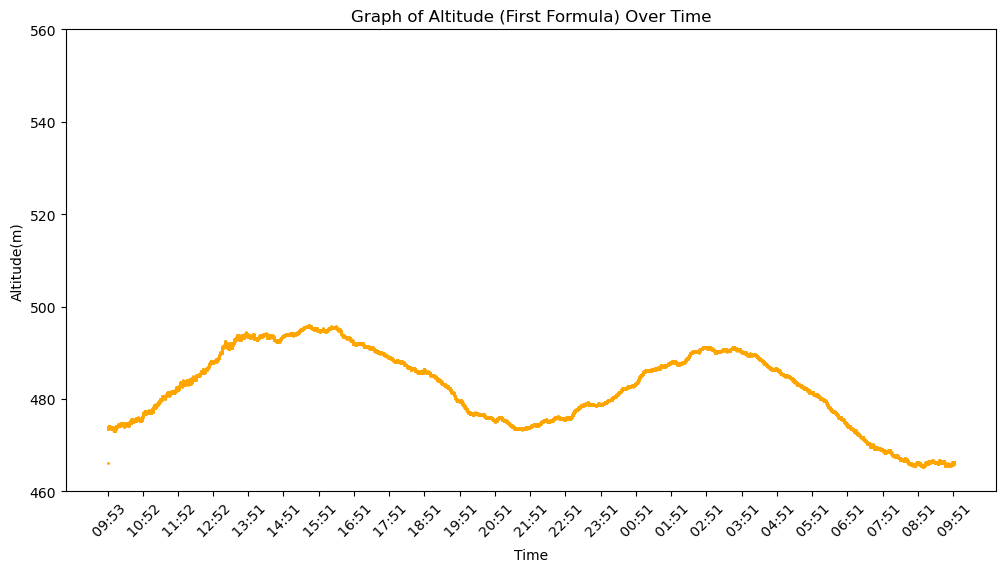

In [12]:
# Now, we will print the graph with the altitude result without the temperature

plt.figure(figsize=(12, 6)) # Dimensions of the figure

lower_limit_Y = 460
upper_limit_Y = 560

#Settings for better viewing
plt.scatter(data["Time"], data["Altitude First formula(without Temp)"], color = 'orange', s = 1)
plt.xlabel("Time") # Time as X axis of the graph
plt.ylabel("Altitude(m)") # Altitude in meters as Y axis of the graph
plt.title("Graph of Altitude (First Formula) Over Time")
plt.xticks(rotation=45)
plt.ylim(lower_limit_Y, upper_limit_Y)

#Filtering schedules into 11 samples
total_points = len(data["Time"])
distance = total_points // 24  
plt.xticks(data["Time"][::distance])

#Figure preview
plt.show()

In [17]:
maximum = data["Altitude First formula(without Temp)"].max()
minimum = data["Altitude First formula(without Temp)"].min()
range = maximum - minimum

# Printing the maximum and minimum value
print("Maximum:", maximum)
print("Minimum:", minimum)
print("Range: {:.2f}".format(range))

Maximum: 495.93
Minimum: 465.33
Range: 30.60


#### * Hypsometric Formula / Second Formula


![Fórmula de Altitude a partir da Fórmula Hipsométrica](images\Capturar3.PNG)


In addition to the variables described in the barometric formula, this formula also includes temperature

* T = Temperature in Celsius

In [5]:
import math 

altitude_with_temp = [] # list that will become a column of the DataFrame

po = 1013.25 # sea level pressure

for i in range(0, len(data["Atmospheric pressure"])):
    pressureN = data["Atmospheric pressure"].iloc[i]
    tempN = data["Temperature"].iloc[i]
    
    altitude = (((pressureN / po) ** (1 / 5.255) - 1) * (tempN + 273.15) / 0.0065) * -1
    altitude_with_temp.append(round(altitude, 2))

data['Altitude Second formula(with Temp)'] = altitude_with_temp

# Saving the updated DataFrame back to the .csv file
data.to_csv('formattedData.csv', index=False)
data

,Date,Time,Atmospheric pressure,Temperature,Altitude First formula(without Temp),Altitude Second formula(with Temp)
0,2024/05/07,09:53,957.6511,30.5261,473.52,499.05
1,2024/05/07,09:53,957.6496,30.5538,473.54,499.11
2,2024/05/07,09:53,957.6395,30.5791,473.62,499.24
3,2024/05/07,09:53,957.6329,30.6057,473.68,499.34
4,2024/05/07,09:53,957.6193,30.6320,473.80,499.51
...,...,...,...,...,...,...
17172,2024/05/08,09:52,958.4785,34.2801,466.32,497.53
17173,2024/05/08,09:52,958.4783,34.3153,466.32,497.58
17174,2024/05/08,09:52,958.4841,34.3571,466.27,497.60
17175,2024/05/08,09:52,958.4869,34.3978,466.24,497.64


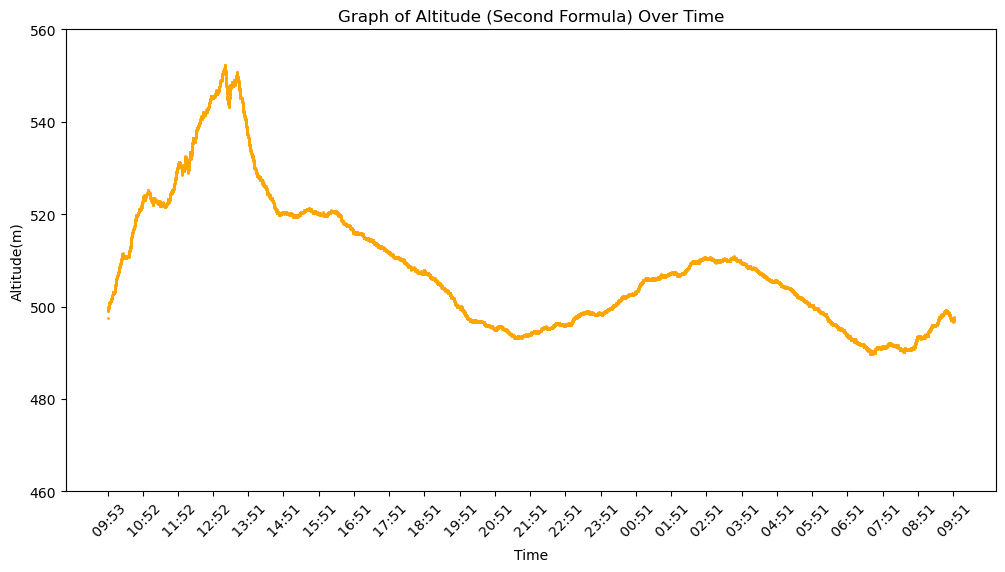

In [13]:
# Now, we will print the graph with the result of altitude with temperature.

plt.figure(figsize=(12, 6)) # Figure dimensions

lower_limit_Y = 460
upper_limit_Y = 560

#Settings for better viewing
plt.scatter(data["Time"], data["Altitude Second formula(with Temp)"], color = 'orange', s = 1)
plt.xlabel("Time") # Time as X-axis of the graph
plt.ylabel("Altitude(m)") # Altitude in meters as Y-axis of the graph
plt.title("Graph of Altitude (Second Formula) Over Time")
plt.xticks(rotation=45)
plt.ylim(lower_limit_Y, upper_limit_Y)

#Filtering schedules in 11 samples
total_points = len(data["Time"])
distance = total_points // 24  
plt.xticks(data["Time"][::distance])

#Figure view
plt.show()

In [7]:
maximumTemp = data["Altitude Second formula(with Temp)"].max()
minimumTemp = data["Altitude Second formula(with Temp)"].min()
rangeTemp = maximumTemp - minimumTemp

# Printing the maximum and minimum values
print("Maximum:", maximumTemp)
print("Minimum:", minimumTemp)
print("Range: {:.2f}".format(rangeTemp))

Maximum: 552.28
Minimum: 489.67
Range: 62.61


## Comparison of both approaches

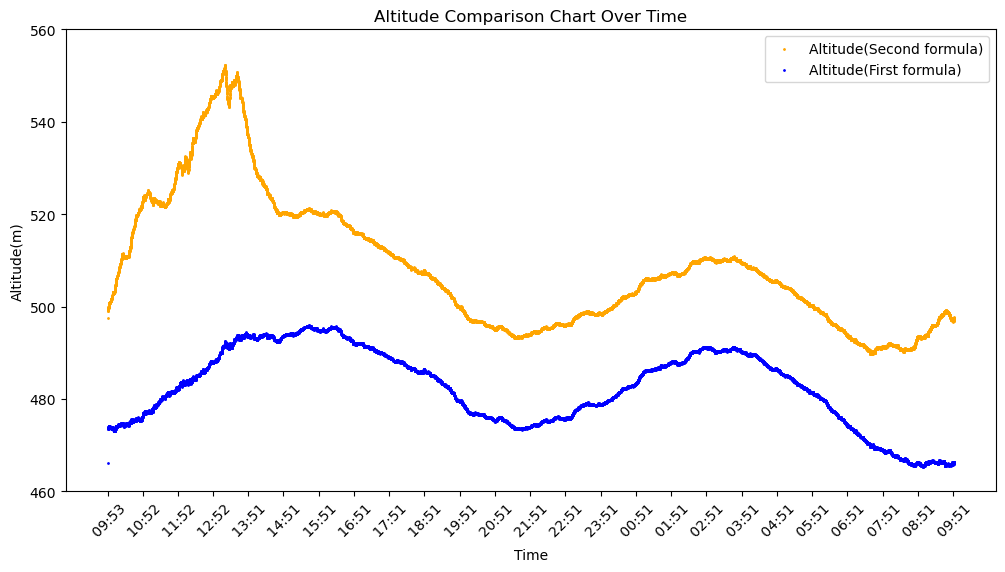

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Figure dimensions

lower_limit_y = 460
upper_limit_y = 560

# Plotting Altitude with Temperature - Second Formula
plt.scatter(data["Time"], data["Altitude Second formula(with Temp)"], color='orange', label='Altitude(Second formula)', s=1)

# Plotting the line corresponding to altitude without temperature - First formula
plt.scatter(data["Time"], data["Altitude First formula(without Temp)"], color='blue', linestyle='-', label='Altitude(First formula)', s=1)

plt.xlabel("Time")  # Time as X-axis of the graph
plt.ylabel("Altitude(m)")  # Altitude as Y axis of graph
plt.title("Altitude Comparison Chart Over Time")

# Setting X-axis limits and ranges
total_points = len(data["Time"])
distance = total_points // 24
plt.xticks(data["Time"][::distance], rotation=45)

plt.ylim(lower_limit_y, upper_limit_y)
plt.legend()
plt.show()


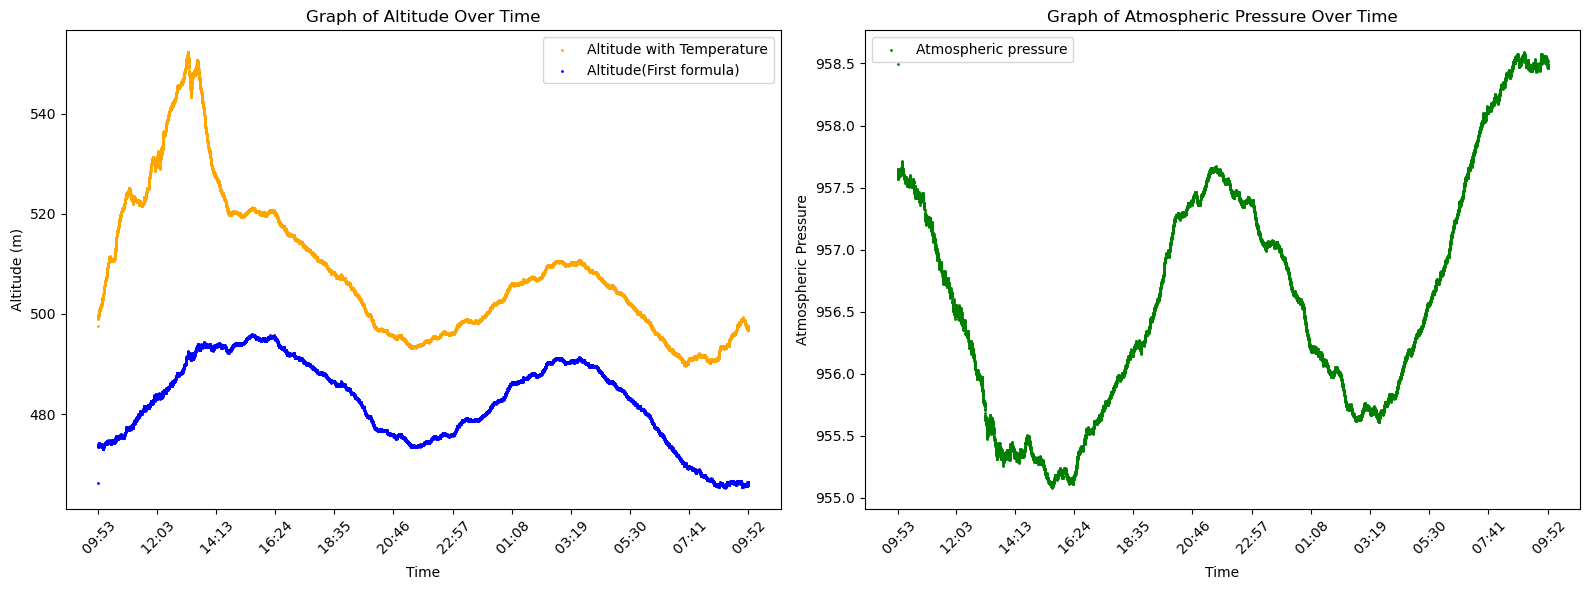

In [23]:
import matplotlib.pyplot as plt

# Setting the size of the figure
plt.figure(figsize=(16, 6))  # Adjust the size as desired

# Subplot for altitude graph
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(data["Time"], data["Altitude Second formula(with Temp)"], color='orange', label='Altitude with Temperature', s=1)
plt.scatter(data["Time"], data["Altitude First formula(without Temp)"], color='blue', linestyle='-', label='Altitude(First formula)', s=1)
plt.xlabel("Time")
plt.ylabel("Altitude (m)")
plt.title("Graph of Altitude Over Time")
plt.xticks(rotation=45)
plt.legend()

total_points = len(data["Time"])
distance = total_points // 11
plt.xticks(data["Time"][::distance], rotation=45)

# Subplot for pressure graph
plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot
plt.scatter(data["Time"], data["Atmospheric pressure"], color='green', label='Atmospheric pressure', s=1)
plt.xlabel("Time")
plt.ylabel("Atmospheric Pressure")
plt.title("Graph of Atmospheric Pressure Over Time")
plt.xticks(rotation=45)
plt.legend()

total_points = len(data["Time"])
distance = total_points // 11
plt.xticks(data["Time"][::distance], rotation=45)

# Layout adjustment to avoid overlapping
plt.tight_layout()

# Displaying subplots
plt.show()
